In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx


In [2]:
def qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos):
    num_qubits = len(qubit_list)
    qubits_per_node = num_qubits//num_nodes
    delta = 0.12
    for i_n in range(num_nodes):
        plt.fill_between([gate_pos-step,gate_final_pos],[(i_n-delta)*qubits_per_node,(i_n-delta)*qubits_per_node],[(i_n+1+delta)*qubits_per_node-1,(i_n+1+delta)*qubits_per_node-1],color="gainsboro")

    for i_q, qubit in enumerate(qubit_list):
        if i_q % 2 ==0:
            plt.plot([gate_pos-step,gate_final_pos],[i_q,i_q],"k")
        else:
            plt.plot([gate_pos-step,gate_final_pos],[i_q,i_q],color="gray")
        plt.text(-3,i_q, qubit, fontsize=6)

def circuit_plot(gate_pos,gate_seq):
    # gate_pos = 0
    # gate_final_pos = gate_pos+ (1+num_gates)*step
    for gate in gate_seq:
        g0 = int(gate[0].split(",")[-1])+ int(gate[0].split(",")[0])* qubits_per_node
        g1 = int(gate[1].split(",")[-1])+ int(gate[1].split(",")[0])* qubits_per_node
        plt.plot([gate_pos,gate_pos],[g0,g1],"k-")
        plt.plot(gate_pos,g0,"ko-",markersize=2.5)
        plt.plot([gate_pos],[g1],"ko-",markersize=6,markerfacecolor="white")
        plt.plot([gate_pos],[g1],"k+",markersize=6,markerfacecolor="white")
        gate_pos += step

    # plt.axis("off")
    # plt.show()
        

[('3,0', '3,2'), ('5,0', '0,0'), ('3,0', '3,1'), ('0,0', '4,1'), ('2,1', '0,1'), ('0,0', '2,0'), ('5,1', '2,2'), ('1,1', '0,1'), ('0,1', '4,2'), ('4,2', '2,0'), ('2,2', '5,0'), ('0,1', '4,0'), ('5,2', '2,0'), ('3,2', '0,0'), ('0,0', '1,2'), ('1,0', '4,2'), ('4,1', '5,0'), ('0,1', '4,2'), ('1,0', '0,0'), ('4,0', '1,0')]


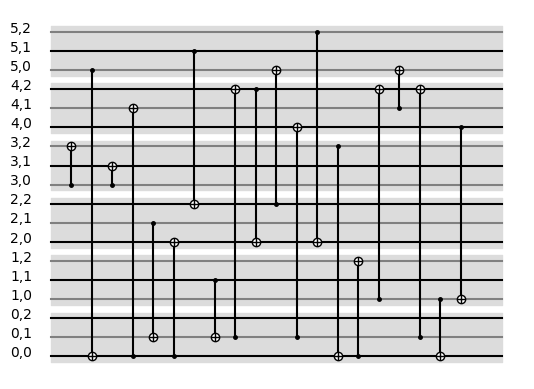

In [26]:
node_list = range(6)
qubits_per_node = 3
num_nodes = len(node_list)
num_qubits = num_nodes * qubits_per_node
num_gates = 20

# Q = nx.Graph()
# Q.add_nodes_from(node_list)

qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        qubit_list.append((f"{node},{qubit}"))

connections = []
for i in range(num_qubits):
    for j in range(i+1,num_qubits):
        if np.random.rand() > 0.5:
            connections.append((qubit_list[i],qubit_list[j]))
        else:
            connections.append((qubit_list[j],qubit_list[i]))

# print(qubit_list)
gate_seq = random.choices(connections, k=num_gates)
print(gate_seq)

gate_pos = 0
step = 1
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

In [29]:
num_nodes = 4
node_list = range(num_nodes)
qubits_per_node = 2
qubit_list = range(qubits_per_node)
num_qubits = num_nodes * qubits_per_node
num_gates = 20

connections = []
for i in range(num_nodes):
    for j in range(i+1,num_nodes):
        if np.random.rand() > 0.5:
            connections.append((node_list[i],node_list[j]))
        else:
            connections.append((node_list[j],node_list[i]))

gate_seq_nodes = random.choices(connections, k=num_gates)
print(gate_seq_nodes)
gate_seq = []
for n1, n2 in gate_seq_nodes:
    gate_seq.append((f"{n1},{random.sample(qubit_list,1)[0]}",f"{n2},{random.sample(qubit_list,1)[0]}"))

print(gate_seq)

[(0, 3), (0, 3), (0, 1), (0, 1), (0, 1), (1, 2), (2, 0), (0, 1), (1, 2), (0, 1), (3, 1), (2, 0), (0, 3), (0, 1), (3, 2), (0, 3), (3, 2), (3, 1), (0, 3), (2, 0)]
[('0,0', '3,0'), ('0,0', '3,0'), ('0,0', '1,0'), ('0,0', '1,0'), ('0,0', '1,0'), ('1,0', '2,0'), ('2,1', '0,1'), ('0,0', '1,0'), ('1,1', '2,1'), ('0,1', '1,1'), ('3,0', '1,1'), ('2,1', '0,0'), ('0,0', '3,1'), ('0,0', '1,1'), ('3,0', '2,0'), ('0,1', '3,1'), ('3,0', '2,1'), ('3,1', '1,1'), ('0,0', '3,0'), ('2,0', '0,0')]


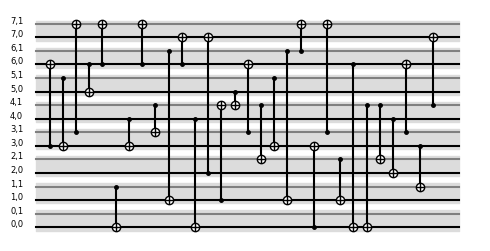

[[('3,0', '6,0'), ('3,1', '7,1'), ('1,1', '0,0'), ('6,1', '1,0')], [('5,1', '3,0'), ('6,0', '5,0'), ('4,1', '3,1')], [('6,0', '7,1'), ('4,0', '3,0'), ('1,0', '4,1')], [('6,0', '7,0'), ('4,0', '0,0'), ('5,0', '4,1'), ('5,1', '3,0'), ('6,1', '1,0')], [('2,0', '7,0'), ('3,1', '6,0'), ('4,1', '2,1'), ('6,1', '7,1'), ('0,0', '3,0')], [('3,1', '7,1'), ('2,1', '1,0'), ('6,0', '0,0'), ('4,0', '2,0'), ('3,0', '1,1')], [('4,1', '0,0'), ('3,1', '6,0')], [('4,1', '2,1')], [('4,1', '7,0')]]


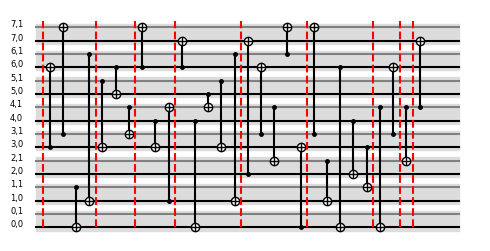

{('1,0', '0,0'): 0, ('1,0', '0,1'): 0, ('1,1', '0,0'): 1, ('1,1', '0,1'): 0, ('0,0', '2,0'): 0, ('0,0', '2,1'): 0, ('0,1', '2,0'): 0, ('0,1', '2,1'): 0, ('0,0', '3,0'): 1, ('0,0', '3,1'): 0, ('0,1', '3,0'): 0, ('0,1', '3,1'): 0, ('4,0', '0,0'): 1, ('4,0', '0,1'): 0, ('4,1', '0,0'): 1, ('4,1', '0,1'): 0, ('0,0', '5,0'): 0, ('0,0', '5,1'): 0, ('0,1', '5,0'): 0, ('0,1', '5,1'): 0, ('6,0', '0,0'): 1, ('6,0', '0,1'): 0, ('6,1', '0,0'): 0, ('6,1', '0,1'): 0, ('0,0', '7,0'): 0, ('0,0', '7,1'): 0, ('0,1', '7,0'): 0, ('0,1', '7,1'): 0, ('2,0', '1,0'): 0, ('2,0', '1,1'): 0, ('2,1', '1,0'): 1, ('2,1', '1,1'): 0, ('3,0', '1,0'): 0, ('3,0', '1,1'): 1, ('3,1', '1,0'): 0, ('3,1', '1,1'): 0, ('1,0', '4,0'): 0, ('1,0', '4,1'): 1, ('1,1', '4,0'): 0, ('1,1', '4,1'): 0, ('1,0', '5,0'): 0, ('1,0', '5,1'): 0, ('1,1', '5,0'): 0, ('1,1', '5,1'): 0, ('6,0', '1,0'): 0, ('6,0', '1,1'): 0, ('6,1', '1,0'): 2, ('6,1', '1,1'): 0, ('1,0', '7,0'): 0, ('1,0', '7,1'): 0, ('1,1', '7,0'): 0, ('1,1', '7,1'): 0, ('2,0', '3,

In [45]:
num_nodes = 8
node_list = range(num_nodes)
qubits_per_node = 2
qubit_list = range(qubits_per_node)
num_qubits = num_nodes * qubits_per_node
num_gates = 30

node_qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        node_qubit_list.append((f"{node},{qubit}"))


connections = []
for i in range(num_nodes):
    for j in range(i+1,num_nodes):
        if np.random.rand() > 0.5:
            connections.append((node_list[i],node_list[j]))
        else:
            connections.append((node_list[j],node_list[i]))

gate_seq_nodes = random.choices(connections, k=num_gates)
# print(gate_seq_nodes)
gate_seq = []
for n1, n2 in gate_seq_nodes:
    gate_seq.append((f"{n1},{random.sample(qubit_list,1)[0]}",f"{n2},{random.sample(qubit_list,1)[0]}"))

# print(gate_seq)

gate_pos = 0
step = 1
plt.figure(figsize=(6,3))
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(node_qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

gate_seq_iter = gate_seq.copy()

Q = nx.Graph()
Q.add_nodes_from(node_qubit_list)

query_seq = []
query = []
gate_mul = {}
gate_mul_seq = []
while len(gate_seq_iter)>0:
    # print(gate_seq_iter)
    inds_keep = []
    not_block_gate = True
    for i_g, gate_nodes in enumerate(gate_seq_iter):
        if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
            if gate_nodes in query and not_block_gate:
                gate_mul[gate_nodes] += 1
                # query.append(gate_nodes)
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                inds_keep.append(i_g)
                not_block_gate = False
        else:
            Q.add_edge(gate_nodes[0],gate_nodes[1])
            query.append(gate_nodes)
            gate_mul[gate_nodes] =  1
            not_block_gate = True

    query_seq.append(query)
    gate_mul_seq.append(gate_mul)
    query = []
    gate_mul = {}
    Q = nx.Graph()
    Q.add_nodes_from(node_qubit_list)
    gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

print(query_seq)
# # print(gate_mul_seq)
# # # Q.add_edges_from(gate_seq)

gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(node_qubit_list,num_nodes,gate_pos,gate_final_pos)

for query in query_seq:
    circuit_plot(gate_pos,query)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()

qubit_connections = []
# for i in range(num_qubits):
#     for j in range(i+1,num_qubits):
#         qubit_connections.append((node_qubit_list[i],node_qubit_list[j]))
for n1, n2 in connections:
    for i in qubit_list:
        for j in qubit_list:
            qubit_connections.append((f"{n1},{i}",f"{n2},{j}"))

gate_mul_orig = {}
gate_mul_query = {}
for link in qubit_connections:
    gate_mul_orig[link] = 0
    gate_mul_query[link] = 0
    
for gate in gate_seq:
    gate_mul_orig[gate] += 1

for i_q, query in enumerate(query_seq):
    for gate in query:
        gate_mul_query[gate] += gate_mul_seq[i_q][gate]

print(gate_mul_orig)
print(gate_mul_query)


Include internal gates and remove them

[('0,0', '2,1'), ('0,1', '1,1'), ('0,1', '2,0'), ('2,0', '2,1'), ('1,0', '1,1'), ('0,1', '1,1'), ('0,0', '1,1'), ('1,0', '3,1'), ('2,0', '2,1'), ('1,0', '1,1'), ('0,1', '1,0'), ('3,0', '3,1'), ('0,1', '3,0'), ('0,1', '2,1'), ('2,0', '3,0'), ('1,0', '3,0'), ('2,1', '3,1'), ('2,1', '3,0'), ('0,1', '1,0'), ('2,0', '2,1')]


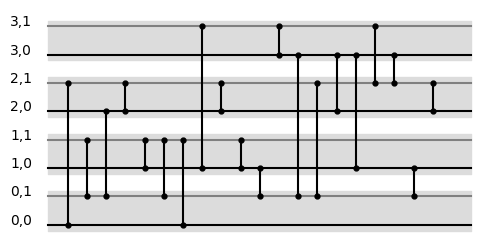

[[('0,0', '2,1'), ('0,1', '1,1')], [('0,1', '2,0'), ('1,0', '1,1')], [('2,0', '2,1'), ('0,1', '1,1'), ('1,0', '3,1')], [('0,0', '1,1'), ('3,0', '3,1')], [('1,0', '1,1')], [('0,1', '1,0')], [('0,1', '3,0')], [('0,1', '2,1'), ('2,0', '3,0')], [('1,0', '3,0'), ('2,1', '3,1')], [('2,1', '3,0'), ('0,1', '1,0')], [('2,0', '2,1')]]
[{('0,0', '2,1'): 1, ('0,1', '1,1'): 1}, {('0,1', '2,0'): 1, ('1,0', '1,1'): 1}, {('2,0', '2,1'): 2, ('0,1', '1,1'): 1, ('1,0', '3,1'): 1}, {('0,0', '1,1'): 1, ('3,0', '3,1'): 1}, {('1,0', '1,1'): 1}, {('0,1', '1,0'): 1}, {('0,1', '3,0'): 1}, {('0,1', '2,1'): 1, ('2,0', '3,0'): 1}, {('1,0', '3,0'): 1, ('2,1', '3,1'): 1}, {('2,1', '3,0'): 1, ('0,1', '1,0'): 1}, {('2,0', '2,1'): 1}]


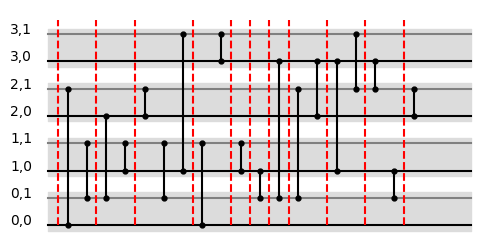

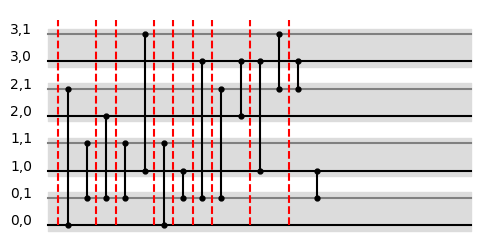

In [86]:
node_list = range(4)
qubits_per_node = 2
num_nodes = len(node_list)
num_qubits = num_nodes * qubits_per_node
num_gates = 20

qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        qubit_list.append((f"{node},{qubit}"))

connections = []
for i in range(num_qubits):
    for j in range(i+1,num_qubits):
        connections.append((qubit_list[i],qubit_list[j]))

Q = nx.Graph()
Q.add_nodes_from(qubit_list)

gate_seq = random.choices(connections, k=num_gates)
print(gate_seq)

gate_pos = 0
step = 1
plt.figure(figsize=(6,3))
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

gate_seq_iter = gate_seq.copy()

query_seq = []
query = []
gate_mul = {}
gate_mul_seq = []
while len(gate_seq_iter)>0:
    # print(gate_seq_iter)
    inds_keep = []
    not_block_gate = True
    for i_g, gate_nodes in enumerate(gate_seq_iter):
        if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
            if gate_nodes in query and not_block_gate:
                gate_mul[gate_nodes] += 1
                # query.append(gate_nodes)
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                inds_keep.append(i_g)
                not_block_gate = False
        else:
            Q.add_edge(gate_nodes[0],gate_nodes[1])
            query.append(gate_nodes)
            gate_mul[gate_nodes] =  1
            not_block_gate = True

    query_seq.append(query)
    gate_mul_seq.append(gate_mul)
    query = []
    gate_mul = {}
    Q = nx.Graph()
    Q.add_nodes_from(qubit_list)
    gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

print(query_seq)
print(gate_mul_seq)
# # # Q.add_edges_from(gate_seq)

gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)

for query in query_seq:
    circuit_plot(gate_pos,query)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()

gate_mul_orig = {}
gate_mul_query = {}
for link in connections:
    gate_mul_orig[link] = 0
    gate_mul_query[link] = 0
    
for gate in gate_seq:
    gate_mul_orig[gate] += 1

for i_q, query in enumerate(query_seq):
    for gate in query:
        gate_mul_query[gate] += gate_mul_seq[i_q][gate]

# print(gate_mul_orig)
# print(gate_mul_query)

remote_query_seq = []
for query in query_seq:
    remote_query = []
    # print(query)
    for gate in query:
        if gate[0].split(",")[0] != gate[1].split(",")[0]:
            remote_query.append(gate)
    if len(remote_query)>0:
        remote_query_seq.append(remote_query)


gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
for query in remote_query_seq:
    circuit_plot(gate_pos,query)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()


In [22]:
def parallel_circuit_gen(node_list, qubits_per_node, num_gates):
    num_nodes = len(node_list)
    # node_list = range(num_nodes)
    # qubits_per_node = 3
    qubit_list = range(qubits_per_node)
    # num_qubits = num_nodes * qubits_per_node
    # num_gates = 30

    node_qubit_list = []
    for node in node_list:
        for qubit in range(qubits_per_node):
            node_qubit_list.append((f"{node},{qubit}"))

    connections = []
    for i in range(num_nodes):
        for j in range(i+1,num_nodes):
            connections.append((node_list[i],node_list[j]))

    gate_seq_nodes = random.choices(connections, k=num_gates)
    # print(gate_seq_nodes)
    gate_seq = []
    for n1, n2 in gate_seq_nodes:
        gate_seq.append((f"{n1},{random.sample(qubit_list,1)[0]}",f"{n2},{random.sample(qubit_list,1)[0]}"))

    gate_seq_iter = gate_seq.copy()

    Q = nx.Graph()
    Q.add_nodes_from(node_qubit_list)

    query_seq = []
    query = []
    gate_mul = {}
    gate_mul_seq = []
    while len(gate_seq_iter)>0:
        # print(gate_seq_iter)
        inds_keep = []
        not_block_gate = True
        for i_g, gate_nodes in enumerate(gate_seq_iter):
            if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
                if gate_nodes in query and not_block_gate:
                    gate_mul[gate_nodes] += 1
                    # query.append(gate_nodes)
                else:
                    Q.add_edge(gate_nodes[0],gate_nodes[1])
                    inds_keep.append(i_g)
                    not_block_gate = False
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                query.append(gate_nodes)
                gate_mul[gate_nodes] =  1
                not_block_gate = True

        query_seq.append(query)
        gate_mul_seq.append(gate_mul)
        query = []
        gate_mul = {}
        Q = nx.Graph()
        Q.add_nodes_from(node_qubit_list)
        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]


    return query_seq, gate_mul_seq

# Clos

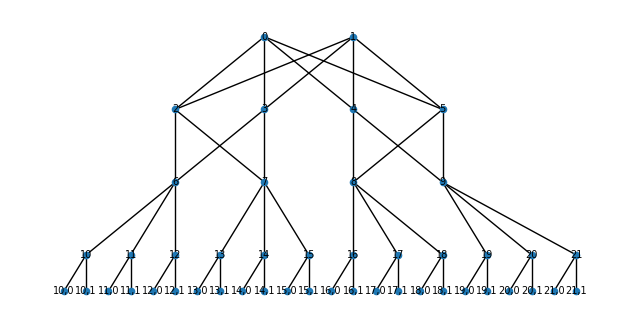

In [35]:
n = 4 # starts from 4
bandwidth = 2
num_ToR = 3
num_qubits_per_node = 2
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

# num_bsm = 1
num_bsm_agg = 2
num_bsm_edge = 2
num_pd = 1
num_laser = 1
num_bs = 1
num_es = 1

num_vertices = num_core + num_agg + num_edge + num_nodes
core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth

G = nx.Graph()
## adding node attributes
# "PD", "BSM", "Laser", "BS", "ES"
attrs = {}

core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
for core in core_switches:
    attrs[core] = {"PD": 0, "BSM_ir":0, "BSM_tel":0, "Laser":0, "BS":0, "ES":0}
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
for agg in agg_switches:
    attrs[agg] = {"PD": 0, "BSM_ir":0, "BSM_tel":num_bsm_agg, "Laser":0, "BS":0, "ES":0}
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='edge')
for edge in edge_switches:
    attrs[edge] = {"PD": num_pd, "BSM_ir": num_bsm_edge, "BSM_tel":0, "Laser": num_laser, "BS": num_bs, "ES": num_es}
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')
node_qubit_list = []
for node in node_list:
    for qubit in range(num_qubits_per_node):
        qname = f"{node},{qubit}"
        node_qubit_list.append(qname)
        G.add_edge(node,qname, weight=1)
        
nx.set_node_attributes(G, attrs)

# G.add_nodes_from(node_qubit_list, type='qubit')

for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg, weight=core_bw)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1], weight=agg_bw)
    agg_conn[i1] -= 1 
    G.add_edge(edge,agg_switches[i1+1], weight=agg_bw)
    agg_conn[i1+1] -= 1 

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j], weight=edge_bw)

shift = 3.5
# pos_core = {i: (shift+i+ n/4 ,2) for i in core_switches}
# pos_agg = {i: (shift+(i-n//2)% n,1) for i in agg_switches}
# pos_edge = {i: (shift+i-7*n/4+1,0) for i in edge_switches}
# pos_nodes = {node: (shift+i/2-1/4,-1) for i, node in enumerate(node_list)}
pos_core = {i: (shift+2*i ,2) for i in core_switches}
pos_agg = {i: (shift+2*((i-n//2)% n-1),1) for i in agg_switches}
pos_edge = {i: (shift+2*i-3.5*n,0) for i in edge_switches}
pos_nodes = {node: (shift+i-n,-1) for i, node in enumerate(node_list)}
pos_qs = {q: (i/2-1,-1.5) for i, q in enumerate(node_qubit_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes | pos_qs


fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
plt.show()

In [7]:
# vertex = "18,1"
# print(G.nodes[vertex])
# print(G.degree[vertex])
# nx.get_node_attributes(G, "BSM")
paths = nx.all_shortest_paths(G, source="10,0", target="13,0")
for path in paths:
    print(path)

['10,0', 10, 6, 2, 7, 13, '13,0']
['10,0', 10, 6, 3, 7, 13, '13,0']


# fat tree

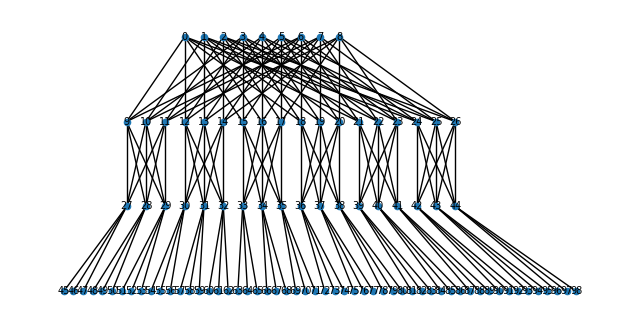

In [5]:
n = 6 # starts from 4
bandwidth = 4
num_bsm = 1
num_core = n**2 // 4
num_agg = n * (n // 2)
num_edge = n * (n // 2)
num_nodes = num_edge * (n // 2) # number of q nodes

core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth
num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')


for i_c, core in enumerate(core_switches):
    for i_a, agg in enumerate(agg_switches):
        if i_c % (n//2) == i_a % (n//2) :
            G.add_edge(core,agg, weight=core_bw)

for i_a, agg in enumerate(agg_switches):
    pod = i_a// (n//2)
    for i_e in range(n//2):
        G.add_edge(agg,edge_switches[pod*(n//2)+i_e], weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(n//2):
        G.add_edge(edge,node_list[(n//2)*i+j], weight=edge_bw)
    

pos_core = {i: (i-n//2 + n**2/4 ,2) for i in core_switches}
pos_agg = {i: ((i-n),1) for i in agg_switches}
pos_edge = {i: ((i-n-(n**2//2)),0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
plt.show()

# TOR switch

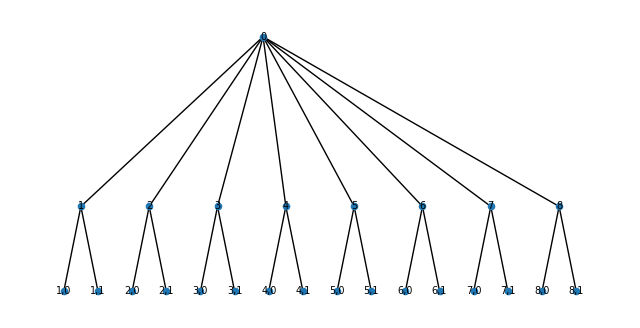

In [5]:
bandwitdth = 1
num_ToR = 8
num_qubits_per_node = 2
num_edge = 1
num_nodes = num_edge * num_ToR # number of q nodes

num_bsm_edge = 2
num_pd = 1
num_laser = 1
num_bs = 1
num_es = 1

num_vertices = num_edge + num_nodes
bandwidth = 1
edge_bw = bandwidth

G = nx.Graph()
## adding node attributes
# "PD", "BSM", "Laser", "BS", "ES"
attrs = {}

edge_switches = range(num_edge)
G.add_nodes_from(edge_switches, type='edge')
for edge in edge_switches:
    attrs[edge] = {"PD": num_pd, "BSM_ir": num_bsm_edge, "BSM_tel":0, "Laser": num_laser, "BS": num_bs, "ES": num_es}
node_list = range(num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')
node_qubit_list = []
for node in node_list:
    for qubit in range(num_qubits_per_node):
        qname = f"{node},{qubit}"
        node_qubit_list.append(qname)
        G.add_edge(node,qname, weight=1)
        
nx.set_node_attributes(G, attrs)

# G.add_nodes_from(node_qubit_list, type='qubit')

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j], weight=edge_bw)

shift = 0
pos_edge = {i: (i+ num_ToR/3,0) for i in edge_switches}
pos_nodes = {node: (shift+i,-1) for i, node in enumerate(node_list)}
pos_qs = {q: (i/2-1/4,-1.5) for i, q in enumerate(node_qubit_list)}
pos =  pos_edge | pos_nodes | pos_qs


fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
plt.show()

gate seq: [('13,1', '18,0'), ('12,0', '20,0'), ('12,1', '21,0'), ('10,0', '11,1'), ('11,0', '21,1'), ('14,0', '19,1')]
('13,1', '18,0')
[2, 4]
bsm: 2 1


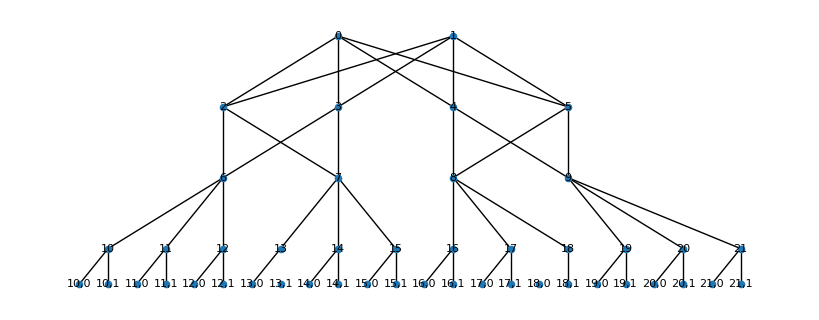

('12,0', '20,0')
[2, 4]
bsm: 4 1


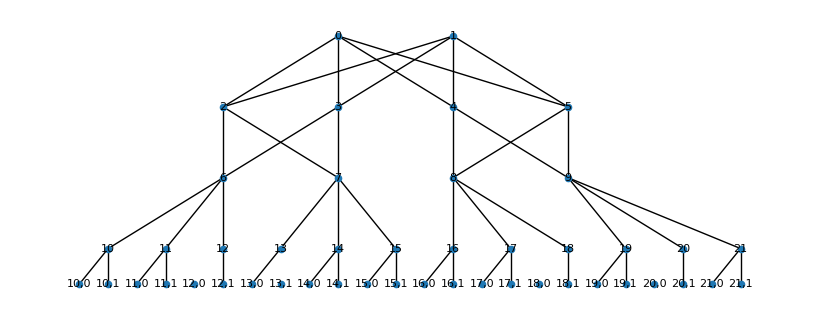

('12,1', '21,0')
[2, 4]
bsm: 4 0


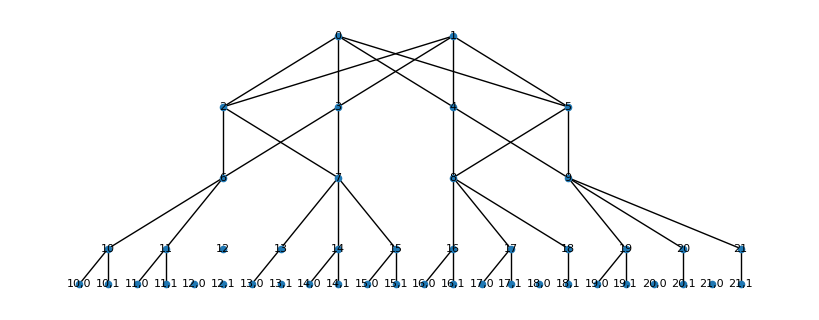

('10,0', '11,1')
[6]
bsm: 6 1


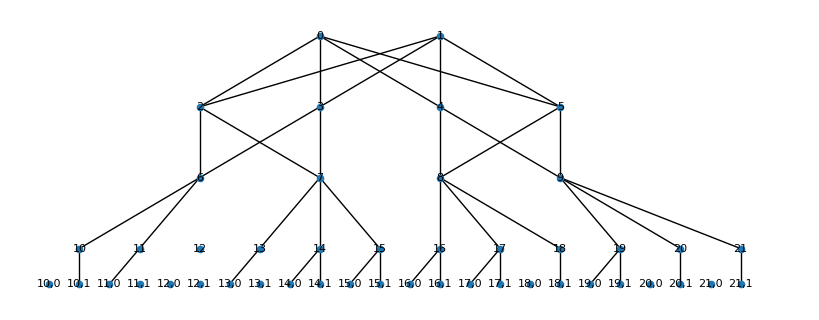

('11,0', '21,1')
[2]
bsm: 2 0


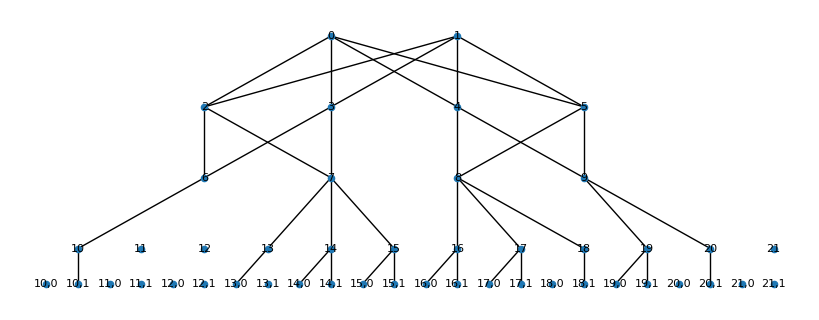

('14,0', '19,1')
[3]
bsm: 3 1


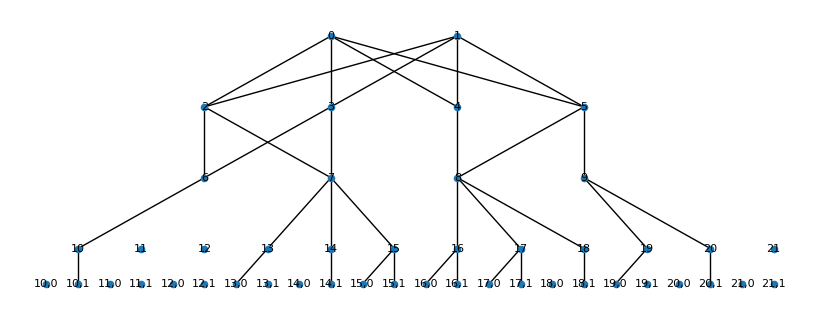

num seq: 6 , num switch: 1 , [[1, 5]]


In [36]:
def plotter(G_ins):
    # print(bsm_stat)
    plt.figure(figsize=(8,3))
    nx.draw(G_ins, pos, node_size=20, font_size=8, with_labels=True)
    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
    # nx.draw(G,  with_labels=True, node_color = color_list)
    plt.show()

num_gates = 1000

# query_seq, gate_mul_seq = parallel_circuit_gen(node_list, num_qubits_per_node, num_gates)

query_seq = [[('13,1', '18,0'), ('12,0', '20,0'), ('12,1', '21,0'), ('10,0', '11,1'), ('11,0', '21,1'), ('14,0', '19,1')]]
# for 
# gate_mul_seq = [[1]*len(query_seq[0])]

# nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
# plt.show()

# for i_q, gate_seq in enumerate(query_seq):
for i_q in [0]:
    gate_seq = query_seq[i_q]

    gate_seq_iter = gate_seq[:]
    gate_mul_seq_iter = gate_mul_seq[i_q]
    print("gate seq:", gate_seq)
    # print("num links:", num_links)

    switch_time = []

    while len(gate_seq_iter)>0:
        # bsm_stat = np.ones(num_edge,dtype=np.int16)* num_bsm
        num_ir_swap = 0
        num_tel_swap = 0
        G_ins =  G.copy()

        # print(gate_seq_iter)
        inds_keep = []
        for i_g, g in enumerate(gate_seq_iter):
            print(g)#, gate_mul_seq_iter[g]) ###

            # for link in range(gate_mul_seq_iter[g]): ####
            for link in range(1):
                # n0 = int(g[0].split(",")[0])
                # n1 = int(g[1].split(",")[0])
                n0 = g[0]
                n1 = g[1]
                if nx.has_path(G_ins,n0,n1):
                    # shortestpath = nx.shortest_path(G_ins,n0,n1,weight=None)
                    paths = nx.all_shortest_paths(G_ins, n0, n1, weight=None)
                    path_found = False
                    for shortestpath in paths:
                        tel_ir = "ir"
                        if len(shortestpath)> 5 :
                            tel_ir = "tel"

                        sp = []
                        b = []
                        for i in range(0,len(shortestpath)-1):
                            sp.append((shortestpath[i],shortestpath[i+1]))
                            if 1 < i < len(shortestpath)-2:
                                sw = shortestpath[i]
                                # print(sw)
                                if G_ins.nodes[sw]["BSM_"+tel_ir] > 0:
                                    b.append(sw)
                        
                        if len(b)>=1:
                            print(b)
                            sw_bsm = random.sample(b,1)[0]
                            G_ins.nodes[sw_bsm]["BSM_"+tel_ir]-= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            if  tel_ir == "tel":
                                num_tel_swap += 1
                            else:
                                num_ir_swap += 1
                            
                            print("bsm:", sw_bsm, G_ins.nodes[sw_bsm]["BSM_"+tel_ir])
                            plotter(G_ins)
                            path_found = True
                            break
        
                    if not path_found:
                        inds_keep.append(i_g)
                        # gate_mul_seq_iter[g] -= link ####
                        break
                    #     assert 0
                    # # # print(bsm_stat)
                    # print(bsm_stat)
                    # plt.figure(figsize=(8,3))
                    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
                    # # nx.draw(G,  with_labels=True, node_color = color_list)
                    # plt.show()
                else:
                    inds_keep.append(i_g)
                    # gate_mul_seq_iter[g] -= link ####
                    break

        switch_time.append([num_ir_swap, num_tel_swap])
        # print(bsm_stat)
        # plt.figure(figsize=(8,3))
        # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
        # # nx.draw(G,  with_labels=True, node_color = color_list)
        # plt.show()

        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]
        # gate_mul_seq_iter = {g:gate_mul_seq_iter[g] for g in gate_seq_iter} ###

    print("num seq:", len(gate_seq), ", num switch:", len(switch_time), ",",switch_time)

out of all shortest paths available to run the ebit protocol, we should choose one at random. the code right now runs in order.

better solution is a ILP formulation of the flow.

In [51]:
F_geo = lambda x,p: np.floor(np.log(1-x)/np.log(1-p))

Nmax =  int(1e6)
switch_time = [1,5,3,10]
p = 0.1
latency = np.zeros(len(switch_time))
for i_N, Nlinks in enumerate(switch_time):
    Ns = np.zeros((Nlinks, Nmax))
    for i in range(Nlinks):
        Ns[i,:] = F_geo(np.random.uniform(low=p, high=1, size=(Nmax,)),p)

    # print(np.max(Ns,axis=0).shape)
    latency[i_N] = np.mean(np.max(Ns,axis=0))

print(latency)


[10.003956 22.180585 17.89486  28.299728]


In [53]:
sum([4,3])

7

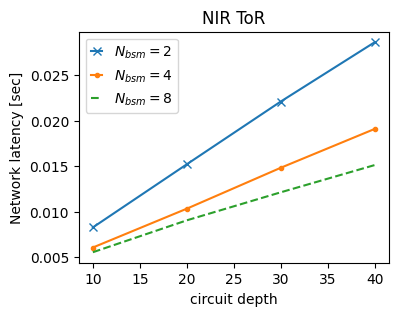

In [25]:
plt.figure(figsize=(4,3))
# bsm = 2
num_gates_list = np.arange(10,41,10)
T_tel_10 = [0.08520000000000003, 0.16788000000000008, 0.2502199999999999, 0.3315399999999997]
T_nir_10 = [0.008275876584979998, 0.015219673198780004, 0.022120536359889992, 0.028644778532000002]
# plt.plot(num_gates_list, T_tel_10,"x-", label=r"$N_{bsm}=2$")
plt.plot(num_gates_list, T_nir_10,"x-", label=r"$N_{bsm}=2$")

# bsm = 4
# Ntor = 40
T_tel_40 = [0.0630400000000001, 0.11930666666666674, 0.17499333333333328, 0.23021, 0.2872983333333335, 0.34299833333333324, 0.39884499999999984, 0.45484, 0.5109549999999999, 0.5664683333333336] 
T_nir_40 = [0.005321750560510002, 0.00900155679877, 0.012497352839020003, 0.015820196824640004, 0.019438950297830004, 0.022915131507149994, 0.026224399422170013, 0.02972329759683, 0.03324319078348001, 0.03649973580919001]
num_gates_list = np.arange(10,101,10)
# plt.plot(num_gates_list, T_tel_40,".-", label="Telecom")
# plt.plot(num_gates_list, T_nir_40,".-", label="NIR")

num_gates_list = np.arange(10,41,10)
# Ntor = 20
T_tel_20 =[0.06498666666666673, 0.11971833333333348, 0.17705333333333337, 0.23476499999999986]
T_nir_20 = [0.005915473933899998, 0.009322454058870002, 0.013072373964459993, 0.016984402070149993]
# plt.plot(num_gates_list, T_tel_20,".-", label="Telecom")
# plt.plot(num_gates_list, T_nir_20,".-", label="NIR")
# Ntor = 10
T_tel_10 = [0.06507833333333335, 0.12400666666666682, 0.18402166666666672, 0.24311666666666665]
T_nir_10 = [0.006064816444540001, 0.010335618785639999, 0.014835071062269995, 0.019107469957089993]
# plt.plot(num_gates_list, T_tel_10,".-", label=r"$N_{bsm}=4$")
plt.plot(num_gates_list, T_nir_10,".-", label=r"$N_{bsm}=4$")

# bsm = 8
T_tel_10 = [0.0577864285714286, 0.10484154761904761, 0.14979821428571433, 0.19308821428571438]
T_nir_10 = [0.005546528576519999, 0.00905524381885, 0.01213706445684, 0.015132912963979997]
# plt.plot(num_gates_list, T_tel_10,"v-", label=r"$N_{bsm}=8$")
plt.plot(num_gates_list, T_nir_10,"--", label=r"$N_{bsm}=8$")

plt.title("NIR ToR")
plt.legend(handlelength=0.8)
plt.xlabel("circuit depth")
plt.ylabel("Network latency [sec]")
# plt.yscale("log")
# plt.ylim([0,0.03])
plt.show()

In [22]:
from network_utils_hybrid import *
import random
import numpy as np
import time

Nrep = 100
num_gates_list = np.arange(10,41,10)
num_ToR = 10

specs = {
    "num_ToR" : num_ToR,
    "qs_per_node" : 10,
    "bandwidth" : 8,
    "num_bsm_ir" : 2,
    "num_pd" : 1, # inactive
    "num_laser" : 1, # inactive
    "num_bs" : 1, # inactive
    "num_es" : 1 # inactive
}

telecom_gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec
nir_prob = 1e-2 # NIR gen prob
qubit_reset = 1e-6 # qubit reset time in sec

T_tel_list = []
T_nir_list = []
# print(problem_size)
num_gates = 100

num_bsm_list = np.arange(2,17,2)
for num_bsm in num_bsm_list:
    specs["num_bsm_ir"] = num_bsm
    G, vertex_list = tor_switch(specs)
    edge_switches, node_list, node_qubit_list  = vertex_list


    tic = time.time()
    print(num_gates)
    T_tel = []
    T_nir = []
    for _ in range(Nrep):
        query_seq, gate_mul_seq = parallel_circuit_gen(node_list, specs["qs_per_node"], num_gates)
        switch_seq = network_latency_multiqubit_hybrid(G, vertex_list, query_seq, gate_mul_seq)

        tel_latency = []
        nir_latency = []
        for switch_time in switch_seq:
            tel_latency.append(1/telecom_gen_rate * time_spdc(np.array(switch_time)).sum() + switch_duration*len(switch_time))
            # nir_latency.append(qubit_reset * time_nir(switch_time, nir_prob).sum() + switch_duration*len(switch_time))

        T_tel.append(sum(tel_latency) + switch_duration * len(switch_seq))
        # T_nir.append(sum(nir_latency) + switch_duration * len(switch_seq))

    T_tel_list.append(sum(T_tel)/len(T_tel))
    # T_nir_list.append(sum(T_nir)/len(T_nir))
    toc = time.time()
    print(f"elapsed time {toc-tic} sec")

print(T_tel_list)
# print(T_nir_list)


100
elapsed time 6.926065921783447 sec
100
elapsed time 3.938966751098633 sec
100
elapsed time 2.908961772918701 sec
100
elapsed time 2.410125255584717 sec
100
elapsed time 2.1912283897399902 sec
100
elapsed time 1.942908525466919 sec
100
elapsed time 1.8185203075408936 sec
100
elapsed time 1.7282524108886719 sec
[0.8231199999999997, 0.5872016666666667, 0.4780666666666664, 0.4173709523809525, 0.3747326190476192, 0.34347280303030303, 0.3258492488067488, 0.310932717005217]


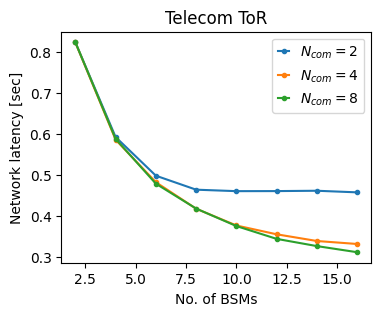

In [24]:
plt.figure(figsize=(4,3))

num_bsm_list = np.arange(2,17,2)
T_tel_2 = [0.8226699999999997, 0.5918016666666667, 0.4975383333333335, 0.4634616666666666, 0.4598805555555557, 0.4600275793650793, 0.46085730158730165, 0.45693626984126956]
plt.plot(num_bsm_list, T_tel_2,".-", label=r"$N_{com}=2$")

T_tel_4 = [0.8225799999999999, 0.585225, 0.4816649999999999, 0.4170154761904762, 0.37612726190476203, 0.35464629148629145, 0.3382952375402376, 0.331023730991231]
plt.plot(num_bsm_list, T_tel_4,".-", label=r"$N_{com}=4$")

T_tel_8 = [0.8231199999999997, 0.5872016666666667, 0.4780666666666664, 0.4173709523809525, 0.3747326190476192, 0.34347280303030303, 0.3258492488067488, 0.310932717005217]
plt.plot(num_bsm_list, T_tel_8,".-", label=r"$N_{com}=8$")

plt.title("Telecom ToR")
plt.legend(handlelength=0.8)
plt.xlabel("No. of BSMs")
plt.ylabel("Network latency [sec]")
# plt.yscale("log")
# plt.ylim([0,0.03])
plt.show()